# Collaborative-Based

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from joblib import dump, load
import seaborn as sns

In [2]:
df_ratings_cleaned=pd.read_csv('./data/ratings_cleaned.csv')

In [3]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [4]:
df_ratings_cleaned.info()
df_ratings_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24874543 entries, 0 to 24874542
Data columns (total 5 columns):
Unnamed: 0    int64
userId        int64
movieId       int64
rating        float64
timestamp     int64
dtypes: float64(1), int64(4)
memory usage: 948.9 MB


,Unnamed: 0,userId,movieId,rating,timestamp
0,0,1,296,5.0,1147880044
1,1,1,306,3.5,1147868817
2,2,1,307,5.0,1147868828
3,3,1,665,5.0,1147878820
4,4,1,899,3.5,1147868510


In [5]:
df = df_ratings_cleaned[['userId','movieId','rating']]
df['rating']=df['rating'].apply(lambda x:x+1)
df.head()

/Users/shenty1991/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,userId,movieId,rating
0,1,296,6.0
1,1,306,4.5
2,1,307,6.0
3,1,665,6.0
4,1,899,4.5


In [6]:
# use surprise to create user-item rating matrix, 10k for initial search for the best algorithm
reader = Reader(rating_scale=(1.0, 6.0))
data = Dataset.load_from_df(df[['userId','movieId','rating']][:10000], reader)


In [7]:
benchmark = []
# Iterate over all algorithms
#algorithms = [SVD()]
algorithms = [SVD(),SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]
for algorithm in algorithms:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
evals = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 
evals

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
BaselineOnly,0.900157,0.701801,0.020949,0.020054
SVDpp,0.907694,0.702333,28.881190,0.896235
SVD,0.908462,0.704477,0.389803,0.018576
KNNBaseline,0.960863,0.738125,0.031929,0.088061
KNNWithZScore,0.981286,0.750890,0.013765,0.076928
KNNWithMeans,0.981420,0.755224,0.005081,0.092366
SlopeOne,1.020391,0.788741,0.284326,0.519785
CoClustering,1.038007,0.800157,0.387859,0.022211
KNNBasic,1.054734,0.813686,0.002745,0.056345


In [8]:
data = Dataset.load_from_df(df[['userId','movieId','rating']][:1000000], reader)

In [9]:
benchmark = []
# Iterate over all algorithms
#algorithms = [SVD()]
algorithms = [SVD(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]
for algorithm in algorithms:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
evals = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 
evals

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
SVD,0.845678,0.645622,61.009710,5.199448
KNNBaseline,0.858774,0.655414,54.690759,1390.478476
BaselineOnly,0.866680,0.664823,2.895793,4.373217
SlopeOne,0.870659,0.663967,47.431057,142.148132
KNNWithMeans,0.881507,0.676740,19.873485,141.404596
KNNWithZScore,0.882197,0.673507,20.181881,146.138817
CoClustering,0.904385,0.700497,15.848847,3.864455
NMF,0.908118,0.710635,88.423483,9.603481
KNNBasic,0.910841,0.692921,20.871573,614.262654


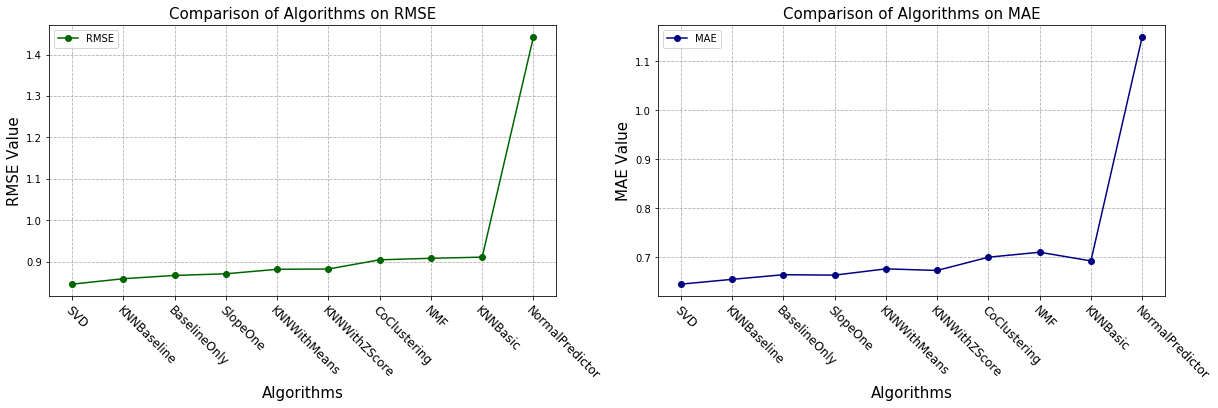

In [10]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(evals.index, evals.test_rmse, label='RMSE', color='darkgreen', marker='o')
plt.xticks(fontsize=12, rotation = -45, ha='left', rotation_mode="anchor")
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(evals.index, evals.test_mae, label='MAE', color='navy', marker='o')
plt.xticks(fontsize=12, rotation = -45, ha='left', rotation_mode="anchor")
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

In [11]:
data = Dataset.load_from_df(df[['userId','movieId','rating']][:1000000], reader)
# determine best parameters for SVD,using around 4% of the total data

svd_param_grid = {'n_epochs': [20, 25], 
                  'lr_all': [0.007, 0.009, 0.01],
                  'reg_all': [0.4, 0.6]}

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=3)
svd_gs.fit(data)

print("SVD - RMSE:", svd_gs.best_score["rmse"])
print("SVD - MAE:", svd_gs.best_score["mae"])


print('SVD - RMSE =', svd_gs.best_params['rmse'])
print('SVD - MAE =', svd_gs.best_params['mae'])

SVD - RMSE: 0.8813448950377678
SVD - MAE: 0.6811560102446688
SVD - RMSE = {'n_epochs': 25, 'lr_all': 0.007, 'reg_all': 0.4}
SVD - MAE = {'n_epochs': 25, 'lr_all': 0.007, 'reg_all': 0.4}


In [12]:
#now train the whole dataframe with the best parameter tested in SVD
data = Dataset.load_from_df(df[['userId','movieId','rating']], reader)
traindata, testdata = train_test_split(data, test_size=0.25)
model = SVD(n_epochs = 25,lr_all = 0.007,reg_all = 0.4)

predictions = model.fit(traindata).test(testdata)
accuracy.rmse(predictions)
accuracy.mae(predictions)


RMSE: 0.8846
MAE:  0.6801


0.6801453807859368

In [ ]:
dump(model, 'model.joblib') 

['model.joblib']

model.predict(1,23123).est